In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from fig_style import *

import sys
sys.path.insert(0,'../')
from disk_model import DiskFitting

import matplotlib

In [2]:
def plot_cumulative_dist(x, **kwargs):
    N = len(x)
    x = np.concatenate(([0],np.sort(x)))
    y = np.arange(N+1)/(N)
    print('ratio of systems with chi^2<=1:',np.sum(x<=1)/len(x))
    plt.plot(x,y,**kwargs)

from get_chi_sq import get_mean_chisq_mult
def plot_chi_sq_dist(Ds,**kwargs):
    chi_sq = get_mean_chisq_mult(Ds)
    plot_cumulative_dist(chi_sq, **kwargs)

In [3]:
with open('../data/fitted_systems/fit_1mm_Q1d5_age1e5.pkl','rb') as f:
    Ds = pickle.load(f)
with open('../data/fitted_systems/fit_1mm_Q1_age1e5.pkl','rb') as f:
    Ds_Q1 = pickle.load(f)
with open('../data/fitted_systems/fit_1mm_Q2_age1e5.pkl','rb') as f:
    Ds_Q2 = pickle.load(f)
with open('../data/fitted_systems/fit_1mm_Q10_age1e5.pkl','rb') as f:
    Ds_Q10 = pickle.load(f)
with open('../data/fitted_systems/fit_1mm_Q100_age1e5.pkl','rb') as f:
    Ds_Q100 = pickle.load(f)
with open('../data/fitted_systems/fit_1cm_Q1d5_age1e5.pkl','rb') as f:
    Ds_1cm = pickle.load(f)
with open('../data/fitted_systems/fit_100um_Q1d5_age1e5.pkl','rb') as f:
    Ds_100um = pickle.load(f)
with open('../data/fitted_systems/fit_10um_Q1d5_age1e5.pkl','rb') as f:
    Ds_10um = pickle.load(f)
with open('../data/fitted_systems/fit_1mm_Q1d5_age2e5.pkl','rb') as f:
    Ds_Mdot_half = pickle.load(f)
with open('../data/fitted_systems/fit_1mm_Q1d5_age5e4.pkl','rb') as f:
    Ds_Mdot_double = pickle.load(f)

ratio of systems with chi^2<=1: 0.5732484076433121
78 resolved systems
ratio of systems with chi^2<=1: 0.569620253164557


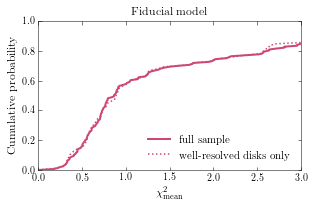

In [13]:
plt.figure(figsize=(4.5,3))
plt.xlim(0,3)
plt.ylim(0,1)
plt.xlabel(r'$\chi_{\rm mean}^2$')
plt.ylabel('Cumulative probability')

colors = matplotlib.cm.get_cmap('plasma')([.5,.5])

plot_chi_sq_dist(Ds, color=colors[0], lw=2)

# find resolved subsample
import astropy.table
data = astropy.table.Table.read("../data/VANDAM_T20_properties.txt", format="ascii")
data.add_index('Source') # add index by source
is_resolved = [data['RdiskA'][data.loc_indices[D.source_name]] > 50 for D in Ds] # disk diameter > 100
print(np.sum(is_resolved),'resolved systems')
plot_chi_sq_dist(np.array(Ds)[is_resolved], color=colors[1], ls=':')

plt.legend(['full sample','well-resolved disks only'], frameon=False, loc=4)
plt.title('Fiducial model', size=12)
set_ticks()

plt.tight_layout()
plt.savefig('../figures/chi_sq_fid.pdf',bbox_inches='tight')

ratio of systems with chi^2<=1: 0.5732484076433121
ratio of systems with chi^2<=1: 0.5732484076433121
ratio of systems with chi^2<=1: 0.5923566878980892
ratio of systems with chi^2<=1: 0.46496815286624205
ratio of systems with chi^2<=1: 0.4585987261146497
ratio of systems with chi^2<=1: 0.5732484076433121
ratio of systems with chi^2<=1: 0.4267515923566879


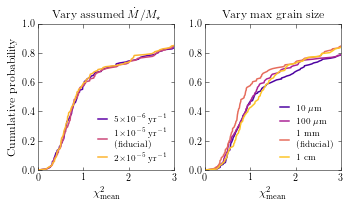

In [11]:
plt.figure(figsize=(5,3))

plt.subplot(121)
plt.xlim(0,3)
plt.ylim(0,1)
plt.xlabel(r'$\chi_{\rm mean}^2$')
plt.ylabel('Cumulative probability')

N = 3
colors = matplotlib.cm.get_cmap('plasma')((np.arange(N)+0.5)/N)

plot_chi_sq_dist(Ds_Mdot_half, color=colors[0])
plot_chi_sq_dist(Ds, color=colors[1])
plot_chi_sq_dist(Ds_Mdot_double, color=colors[2])

plt.legend([r'$5{\times}10^{-6}$ yr$^{-1}$',
            r'$1{\times}10^{-5}$ yr$^{-1}$'+'\n(fiducial)',
            r'$2{\times}10^{-5}$ yr$^{-1}$'], frameon=False, fontsize=9, handlelength=1, loc=4)
plt.title(r'Vary assumed $\dot M/M_\star$', size=12)
set_ticks()

plt.subplot(122)
plt.xlim(0,3)
plt.ylim(0,1)
plt.xlabel(r'$\chi_{\rm mean}^2$')
#plt.ylabel('Cumulative probability')

N = 4
colors = matplotlib.cm.get_cmap('plasma')((np.arange(N)+0.5)/N)

plot_chi_sq_dist(Ds_10um, color=colors[0])
plot_chi_sq_dist(Ds_100um, color=colors[1])
plot_chi_sq_dist(Ds, color=colors[2])
plot_chi_sq_dist(Ds_1cm, color=colors[3])

plt.legend([r'10 $\mu$m',
            r'100 $\mu$m',
            r'1 mm'+'\n(fiducial)',
            r'1 cm'], frameon=False, fontsize=9, handlelength=1, loc=4)
plt.title(r'Vary max grain size', size=12)
set_ticks()


plt.tight_layout()

plt.savefig('../figures/chi_sq_Mdot_and_amax.pdf',bbox_inches='tight')

ratio of systems with chi^2<=1: 0.5159235668789809
ratio of systems with chi^2<=1: 0.5732484076433121
ratio of systems with chi^2<=1: 0.5923566878980892
ratio of systems with chi^2<=1: 0.5859872611464968
ratio of systems with chi^2<=1: 0.2929936305732484


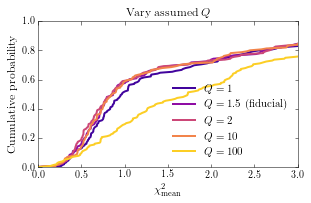

In [10]:
plt.figure(figsize=(4.5,3))
plt.xlim(0,3)
plt.ylim(0,1)
plt.xlabel(r'$\chi_{\rm mean}^2$')
plt.ylabel('Cumulative probability')

N = 5
colors = matplotlib.cm.get_cmap('plasma')((np.arange(N)+0.5)/N)

plot_chi_sq_dist(Ds_Q1, color=colors[0], lw=2)
plot_chi_sq_dist(Ds, color=colors[1], lw=2)
plot_chi_sq_dist(Ds_Q2, color=colors[2], lw=2)
plot_chi_sq_dist(Ds_Q10, color=colors[3], lw=2)
plot_chi_sq_dist(Ds_Q100, color=colors[4], lw=2)

plt.legend([r'$Q=1$',
            r'$Q=1.5$ (fiducial)',
            r'$Q=2$',
            r'$Q=10$',
            r'$Q=100$'], frameon=False, loc=4)
plt.title(r'Vary assumed $Q$',size=12)

plt.tight_layout()
set_ticks()
plt.savefig('../figures/chi_sq_Q.pdf',bbox_inches='tight')